In [ ]:
#Generative Adversarial Networks GANs
#variational autoencoder for molecule desing

In [ ]:
##setup tensorflow v1
%tensorflow_version 1.x

TensorFlow 1.x selected.


In [ ]:
## this will install anaconda and deepchem, will add path, execution will take sometime

!wget -c https://repo.anaconda.com/archive/Anaconda3-2019.10-Linux-x86_64.sh
!chmod +x Anaconda3-2019.10-Linux-x86_64.sh
!bash ./Anaconda3-2019.10-Linux-x86_64.sh -b -f -p /usr/local
!conda install -y -c deepchem -c rdkit -c conda-forge -c omnia deepchem-gpu=2.3.0
import sys
sys.path.append('/usr/local/lib/python3.7/site-packages/')

--2020-07-27 10:55:34--  https://repo.anaconda.com/archive/Anaconda3-2019.10-Linux-x86_64.sh
Resolving repo.anaconda.com (repo.anaconda.com)... 104.16.130.3, 104.16.131.3, 2606:4700::6810:8203, ...
Connecting to repo.anaconda.com (repo.anaconda.com)|104.16.130.3|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 530308481 (506M) [application/x-sh]
Saving to: ‘Anaconda3-2019.10-Linux-x86_64.sh’

Anaconda3-2019.10-L 100%[===================>] 505.74M   190MB/s    in 2.7s    

2020-07-27 10:55:37 (190 MB/s) - ‘Anaconda3-2019.10-Linux-x86_64.sh’ saved [530308481/530308481]

PREFIX=/usr/local
Unpacking payload ...
Solving environment: - \ | / - \ | / - \ | / - \ | / - \ | / done

## Package Plan ##

  environment location: /usr/local

  added / updated specs:
    - _ipyw_jlab_nb_ext_conf==0.1.0=py37_0
    - _libgcc_mutex==0.1=main
    - alabaster==0.7.12=py37_0
    - anaconda-client==1.7.2=py37_0
    - anaconda-navigator==1.9.7=

In [ ]:
############## check deepchem installation by 
import deepchem as dc
dc.__version__ #should match with the installed

/usr/local/lib/python3.6/dist-packages/sklearn/externals/joblib/__init__.py:15: FutureWarning: sklearn.externals.joblib is deprecated in 0.21 and will be removed in 0.23. Please import this functionality directly from joblib, which can be installed with: pip install joblib. If this warning is raised when loading pickled models, you may need to re-serialize those models with scikit-learn 0.21+.
  warnings.warn(msg, category=FutureWarning)


The TensorFlow contrib module will not be included in TensorFlow 2.0.
For more information, please see:
  * https://github.com/tensorflow/community/blob/master/rfcs/20180907-contrib-sunset.md
  * https://github.com/tensorflow/addons
  * https://github.com/tensorflow/io (for I/O related ops)
If you depend on functionality not listed there, please file an issue.



'2.3.0'

In [ ]:
tasks, datasets, transformers = dc.molnet.load_muv()
train_dataset, valid_dataset, test_dataset = datasets
train_smiles = train_dataset.ids

Loading raw samples now.
shard_size: 8192
About to start loading CSV from /tmp/muv.csv.gz
Loading shard 1 of size 8192.
Featurizing sample 0
Featurizing sample 1000
Featurizing sample 2000
Featurizing sample 3000
Featurizing sample 4000
Featurizing sample 5000
Featurizing sample 6000
Featurizing sample 7000
Featurizing sample 8000
TIMING: featurizing shard 0 took 36.188 s
Loading shard 2 of size 8192.
Featurizing sample 0
Featurizing sample 1000
Featurizing sample 2000
Featurizing sample 3000
Featurizing sample 4000
Featurizing sample 5000
Featurizing sample 6000
Featurizing sample 7000
Featurizing sample 8000
TIMING: featurizing shard 1 took 35.893 s
Loading shard 3 of size 8192.
Featurizing sample 0
Featurizing sample 1000
Featurizing sample 2000
Featurizing sample 3000
Featurizing sample 4000
Featurizing sample 5000
Featurizing sample 6000
Featurizing sample 7000
Featurizing sample 8000
TIMING: featurizing shard 2 took 35.726 s
Loading shard 4 of size 8192.
Featurizing sample 0
Feat

In [ ]:
#generate grammar
tokens = set()
for s in train_smiles:
  tokens = tokens.union(set(s))
tokens = sorted(list(tokens))
max_length = max(len(s) for s in train_smiles)

In [ ]:
print(tokens)
print (max_length)

['#', '(', ')', '+', '-', '/', '1', '2', '3', '4', '5', '6', '=', 'B', 'C', 'F', 'H', 'N', 'O', 'S', '[', '\\', ']', 'c', 'l', 'n', 'o', 'r', 's']
86


In [ ]:
# architcture is Aspuruguzik Autoencoder

In [ ]:
# AspuruGuzikAutoEncoder class, which implements a particular published model. It
# uses a convolutional network for the encoder and a recurrent network for the
# decoder.

In [ ]:
# Build the model.

from deepchem.models.optimizers import ExponentialDecay
from deepchem.models.seqtoseq import AspuruGuzikAutoEncoder
batch_size = 100
batches_per_epoch = len(train_smiles)/batch_size
learning_rate = ExponentialDecay(0.001, 0.95, batches_per_epoch)
model = AspuruGuzikAutoEncoder(tokens, max_length, model_dir='vae', 
                               batch_size=batch_size, learning_rate=learning_rate)

Instructions for updating:
If using Keras pass *_constraint arguments to layers.




In [114]:
# Train the model.

def generate_sequences(epochs):
  for i in range(epochs):
    for s in train_smiles:
      yield (s, s)

model.fit_sequences(generate_sequences(10))

KeyboardInterrupt: ignored

In [115]:
model.restore()
#disconnected runtime in between so loading the model trained till the last checkpoint

In [20]:
# generate some molecules, I don't know till how many iterations the model trained

In [199]:
# remove redundant SMILES
import numpy as np
from rdkit import Chem
n_mols = 10000
#generates new vectors
predictions = model.predict_from_embeddings(np.random.normal(size=(n_mols,196)))
molecules = []
for p in predictions:
  smiles = ''.join(p)
  if Chem.MolFromSmiles(smiles) is not None:
    molecules.append(smiles)

In [200]:
#generated valid molecules
print('Generated molecules:')
#print(molecules)
print('Out of ' + str(n_mols) +' inputs, only valid molecules are: ',len(molecules))

Generated molecules:
Out of 10000 inputs, only valid molecules are:  772


In [29]:
#molecules

In [31]:
#analysis of the molecules generated here and those given and book
# its evident that I didn't train the model for long so the molecules it generated are bad,
# those given in book are good examples
molecules_book = ['CCCCCCNNNCCOCC',
'O=C(O)C(=O)ON/C=N/CO',
'C/C=N/COCCNSCNCCNN',
'CCCNC(C(=O)O)c1cc(OC(OC)[SH](=O)=O)ccc1N',
'CC1=C2C=CCC(=CC(Br)=CC=C1)C2',
'CCN=NNNC(C)OOCOOOOOCOOO',
'N#CNCCCCCOCCOC1COCNN1CCCCCCCCCCCCCCCCCCCOOOOOSNNCCCCCSCSCCCCCCCCCOCOOOSS',
'CCCC(=O)NC1=C(N)C=COO1',
'CCCSc1cc2nc(C)cnn2c1NC',
'CONCN1N=NN=CC=C1CC1SSS1',
'CCCOc1ccccc1OSNNOCCNCSNCCN',
'C[SH]1CCCN2CCN2C=C1N',
'CC1=C(C#N)N1NCCC1=COOO1',
'CN(NCNNNN)C(=O)CCSCc1ccco1',
'CCCN1CCC1CC=CC1=CC=S1CC=O',
'C/N=C/c1ccccc1',
'Nc1cccooo1',
'CCOc1ccccc1CCCNC(C)c1nccs1',
'CNNNNNNc1nocc1CCNNC(C)C',
'COC1=C(CON)C=C2C1=C(C)c1ccccc12',
'CCOCCCCNN(C)C',
'CCCN1C(=O)CNC1C',
'CCN',
'NCCNCc1cccc2c1C=CC=CC=C2',
'CCCCCN(NNNCNCCCCCCCCCCSCCCCCCCCCCCCCCNCCNCCCCSSCSSSSSSCCCCCCCCCCCCCSCCCCCSC)\
C(O)OCCN',
'CCCS1=CC=C(C)N(CN)C2NCC2=C1',
'CCNCCCCCCOc1cccc(F)c1',
'NN1O[SH](CCCCO)C12C=C2',
'Cc1cc2cccc3c(CO)cc-3ccc-2c1']

In [127]:
#converts to molecules from smiles
mols = [Chem.MolFromSmiles(x) for x in molecules_book]

In [120]:
#small molecules are insufficient in generating enough interaction energy
# large molecules do not dissolve in water

In [128]:
print(sorted([x.GetNumAtoms() for x in mols]))

[3, 8, 9, 10, 11, 11, 12, 12, 13, 14, 14, 14, 15, 16, 16, 16, 17, 17, 17, 17, 18, 19, 19, 20, 20, 22, 24, 69, 80]


In [122]:
good_mol_list = [x for x in mols if x.GetNumAtoms() > 10 and x.GetNumAtoms() < 50]
print(len(good_mol_list))

23


In [36]:
# select on the basis of QED Quantitative estimation of drug values

In [65]:
from rdkit.Chem import QED,Draw,MolToSmiles

In [123]:
qed_list = [QED.qed(x) for x in good_mol_list]
final_mol_list = [(a,b) for a,b in zip(good_mol_list,qed_list) if b > 0.5]

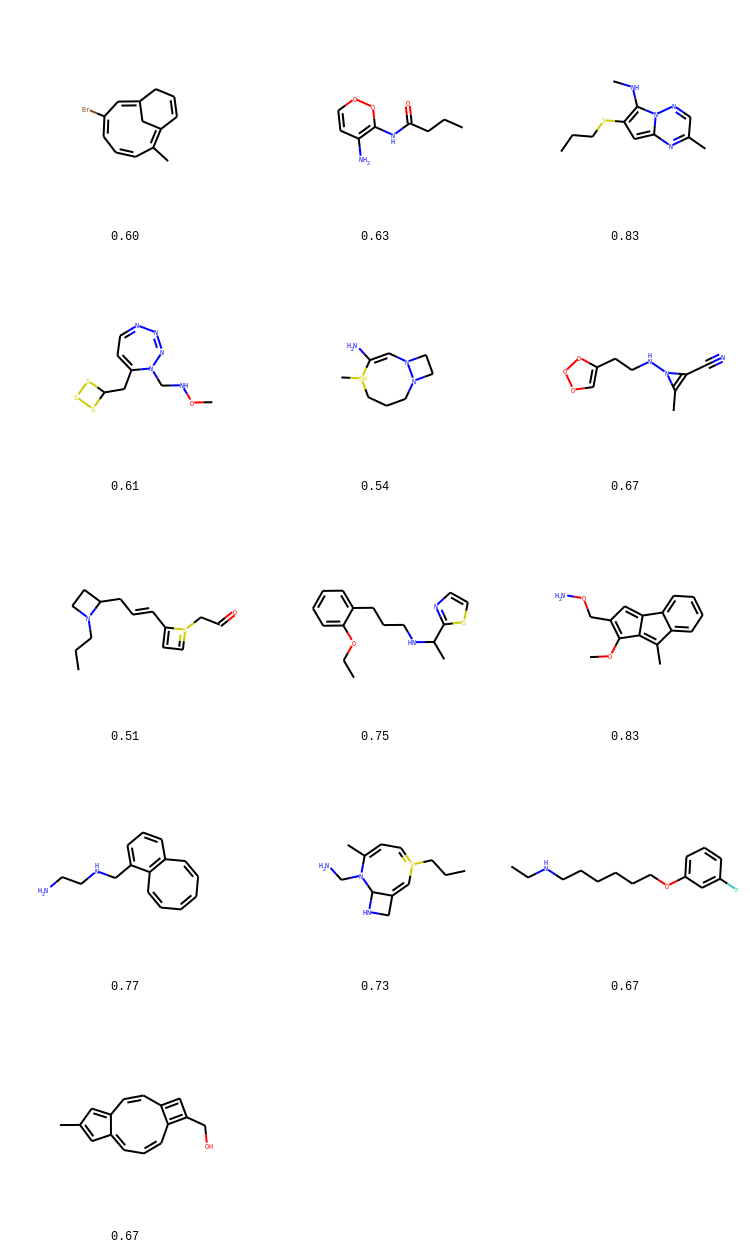

In [124]:
#visualize
Draw.MolsToGridImage([x[0] for x in final_mol_list],molsPerRow=3,useSVG=False,subImgSize=(250, 250),legends=[f"{x[1]:.2f}" for x in final_mol_list])

In [201]:
#for the molecules my model generated
mols = [Chem.MolFromSmiles(x) for x in molecules]

In [202]:
len(mols)

772

In [203]:
print(sorted([x.GetNumAtoms() for x in mols]))

[16, 19, 19, 19, 20, 20, 20, 20, 20, 20, 20, 21, 22, 22, 22, 22, 22, 22, 22, 22, 22, 23, 23, 23, 24, 24, 24, 24, 24, 25, 25, 25, 25, 25, 25, 25, 25, 25, 25, 25, 25, 26, 26, 26, 26, 26, 27, 27, 27, 27, 27, 27, 27, 27, 27, 27, 28, 28, 28, 28, 28, 28, 28, 28, 28, 28, 28, 28, 28, 28, 28, 28, 29, 29, 29, 29, 29, 29, 29, 29, 29, 29, 29, 29, 29, 29, 29, 29, 29, 29, 29, 30, 30, 30, 30, 30, 30, 30, 30, 30, 31, 31, 31, 31, 31, 31, 31, 32, 32, 32, 32, 32, 32, 32, 32, 32, 32, 32, 32, 32, 32, 33, 33, 33, 33, 33, 33, 33, 33, 33, 33, 33, 33, 33, 33, 33, 33, 33, 33, 34, 34, 34, 34, 34, 34, 34, 34, 34, 34, 34, 35, 35, 35, 35, 35, 35, 35, 35, 35, 35, 35, 35, 35, 35, 35, 35, 35, 36, 36, 36, 36, 36, 36, 37, 37, 37, 37, 37, 37, 37, 37, 37, 37, 37, 38, 38, 38, 38, 38, 38, 38, 38, 38, 38, 38, 38, 39, 39, 39, 39, 39, 39, 39, 39, 39, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 41, 41, 41, 41, 41, 41, 42, 42, 42, 42, 42, 43, 43, 43, 43, 43, 43, 43, 43, 44, 44, 44, 44, 44, 44, 45, 45, 45, 45, 45, 45,

In [208]:
good_mol_list = [x for x in mols if x.GetNumAtoms() > 10 and x.GetNumAtoms() < 90]
print(len(good_mol_list))

772


In [91]:
#out of 992, 774 molecules are left for analysis after sorting by size

In [230]:
# QED check
qed_list = [QED.qed(x) for x in good_mol_list]
final_mol_list = [(a,b) for a,b in zip(good_mol_list,qed_list) if b > 0.4]

In [231]:
# out of 395, only 6 molecules left after QED analysis
len(final_mol_list)

11

In [223]:
#final_mol_list

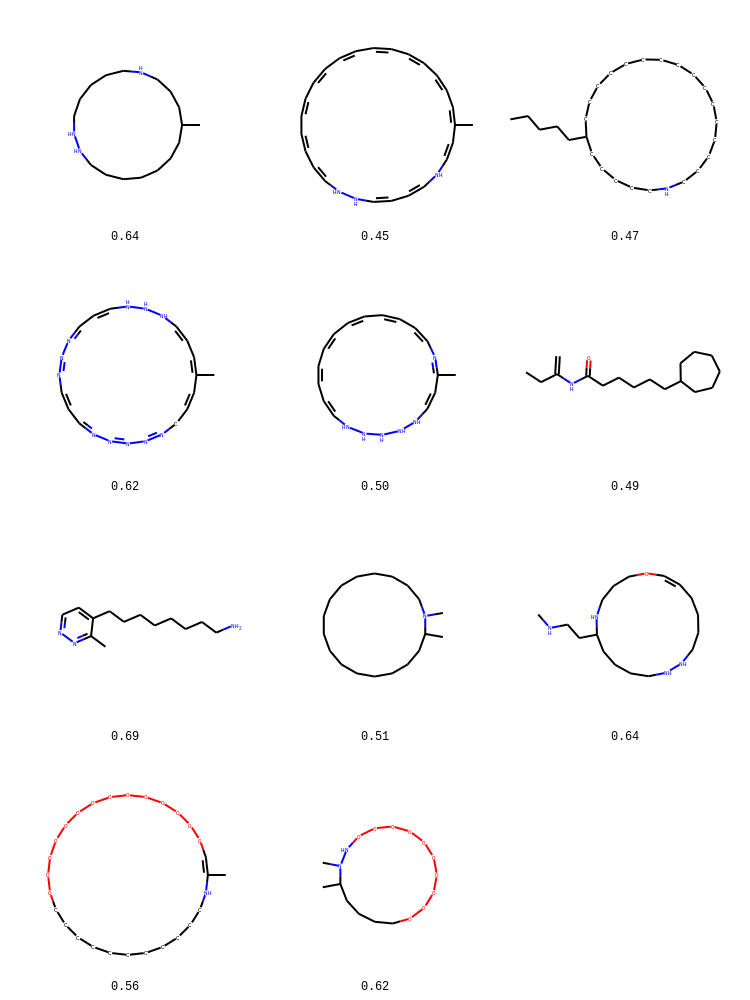

In [232]:
#visualize the useless list of molecules
Draw.MolsToGridImage([x[0] for x in final_mol_list],molsPerRow=3,useSVG=False,subImgSize=(250, 250),legends=[f"{x[1]:.2f}" for x in final_mol_list])

In [198]:
#out of all these structures none looks possible structurally

In [233]:
mol_list = [x[0] for x in final_mol_list]

In [234]:
for item in mol_list:
  print(MolToSmiles(item))

CC1CCCCCCCNNCCCCCNCCC1
Cc1ccccccccccccccccc[nH][nH]cccc[nH]cc1
CCCCCC1CCCCCCCCCCCCCCCCNCCCCC1
CC1=CC=CNNNC=CC=NN=NC=CC=NN=NN=NCC=C1
Cc1cc[nH][nH][nH][nH][nH]ccccccccccccn1
C=C(CC)NC(=O)CCCCCC1CCCCCC1
Cc1nnccc1CCCCCCCCN
CC1CCCCCCCCCCCCCCCCN1C
CNCCC1CCCCNNCCCCC=COCCCN1
CC1=COOOOOOOOOOOOOOCCCCCCCCCCCN1
CC1CCCCOOOOOOOOOONN1C


In [237]:
#only useful molecules
bestmol1 = 'CCCC(=O)CC(CC)CC1=CC=CCCC1C'
bestmol2 = 'CCCCCC1CCCC12C(=O)NN2C'
bestmol3 = 'CCCCCCCCNC(=O)C1=C(C(=O)OCC)C=CC=CC1'
bestmol4 = 'CCCCCC1CC=C1C(=O)CNNNC(=O)CN'
bestmol5 = 'Cc1nnccc1CCCCCCCCN'
bestmol1 = [Chem.MolFromSmiles(bestmol1)]
bestmol2 = [Chem.MolFromSmiles(bestmol2)]
bestmol3 = [Chem.MolFromSmiles(bestmol3)]
bestmol4 = [Chem.MolFromSmiles(bestmol4)]
bestmol5 = [Chem.MolFromSmiles(bestmol5)]

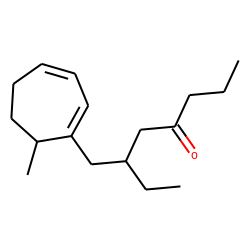

In [180]:
#visualize the useless list of molecules
Draw.MolsToGridImage(bestmol1,molsPerRow=1,useSVG=False,subImgSize=(250, 250))

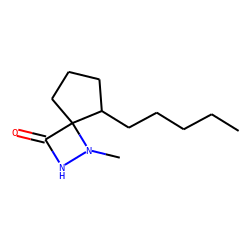

In [113]:
#visualize the useless list of molecules
Draw.MolsToGridImage(bestmol2,molsPerRow=1,useSVG=False,subImgSize=(250, 250))

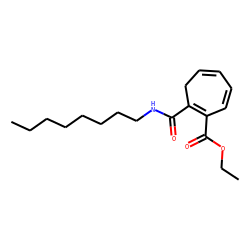

In [181]:
Draw.MolsToGridImage(bestmol3,molsPerRow=1,useSVG=False,subImgSize=(250, 250))

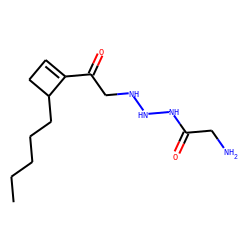

In [229]:
Draw.MolsToGridImage(bestmol4,molsPerRow=1,useSVG=False,subImgSize=(250, 250))

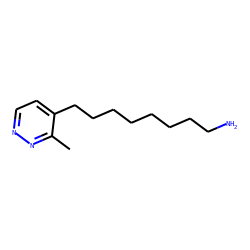

In [238]:
Draw.MolsToGridImage(bestmol5,molsPerRow=1,useSVG=False,subImgSize=(250, 250))

In [240]:
#summary of the best compounds generated
# molecule1 SMILE = CCCC(=O)CC(CC)CC1=CC=CCCC1C
# molecule1 IUPAC = 6-[(7-Methyl-1,3-cycloheptadien-1-yl)methyl]-4-octanone
# molecule2 SMILE = CCCCCC1CCCC12C(=O)NN2C
# molecule2 IUPAC = 1-Methyl-5-pentyl-1,2-diaza-3-spiro[3.4]octanone
# molecule3 SMILE = CCCCCCCCNC(=O)C1=C(C(=O)OCC)C=CC=CC1
# molecule3 IUPAC = Ethyl 2-(N-octylcarbamoyl)-1,4,6-cycloheptatriene-1-carboxylate
# molecule4 SMILE = CCCCCC1CC=C1C(=O)CNNNC(=O)CN
# molecule4 IUPAC = 2-Amino-1-{3-[2-oxo-2-(4-pentyl-1-cyclobuten-1-yl)ethyl]triazanyl}-1-ethanone
# molecule5 SMILE = Cc1nnccc1CCCCCCCCN
# molecule5 IUPAC = 8-(3-Methyl-4-pyridazinyl)octylamine

In [239]:
#chapter completed.